In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk

In [10]:
data = pd.read_csv('preprocessed_posts.csv')

In [11]:
data

,caption,caption_norm,nama_tempat,jam_operasional,alamat,kota,akun_instagram,open_time,close_time,is_24h,is_overnight,menu_category,function_category
0,Seriussn waktu itu pas lewat kirain gedung nik...,seriussn waktu itu pas lewat kirain gedung nik...,Lyon’s Cafe & Coworking Space,24 Jam,"Jl. Nyi Tjondrolukito No 82, Kutu Dukuh, Sindu...",Sleman,@lyonscafe.co,00:00,23:59,True,False,['kopi'],['wfc']
1,Seriusan coffee shop baru 24 jam dari Bandung ...,seriusan coffee shop baru 24 jam dari bandung ...,Beri Kopi Jogja,24 Jam,"Dero, Condongcatur, Sleman, Yogyakarta",Sleman,@berikopi.jogja,00:00,23:59,True,False,"['kopi', 'makanan']","['wfc', 'hangout', 'dating']"
2,Baru di Jogja - Artisan bakery & coffee esteti...,baru di jogja - artisan bakery coffee estetik ...,Elder On The Table - EOTB,07:00 - 22:00,"Jl. Kranggan, Jetis, Yogyakarta",Yogyakarta,"@elder.onthetable, @elderpatisserie",07:00,22:00,False,False,"['kopi', 'dessert']",['dating']
3,Cold ‘N Brew baru aja buka cabangnya di Maliob...,cold n brew baru aja buka cabangnya di maliobo...,Seperti cabang lainnya,24 Jam,"Jl. Mataram, Yogyakarta",Yogyakarta,@coldnbrew,00:00,23:59,True,False,[],['wfc']
4,Baru lagi di Jogja! Coffee & dining artistik a...,baru lagi di jogja coffee dining artistik aest...,Waktu Luang De Loji,10:00 - 22:00,"Jl. Panembahan Senopati, Prawirodirjan, Kec. G...",Yogyakarta,@waktuluang.deloji,10:00,22:00,False,False,['makanan'],['dating']
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,"Lunaria, coffee and eatery estetik baru di Ged...","lunaria, coffee and eatery estetik baru di ged...",Lunaria Coffee,08:00 - 22:00,Jl. Gedongkiwo No.29 (Pojok Beteng Kulon),Lainnya,@lunariacoffee,08:00,22:00,False,False,"['kopi', 'makanan']","['wfc', 'hangout']"
372,"Kolokial Coffee, coffee shop bertema medieval ...","kolokial coffee, coffee shop bertema medieval ...",Kolokial Coffee,09:00-22.00,"Jl. Affandi No.30, Condongcatur, Depok, Kabupa...",Sleman,@kolokial.coffeeyk,09:00,22:00,False,False,['makanan'],['hangout']
373,Merindu bersama di Ruang Rindu Coffee\n\nCoffe...,merindu bersama di ruang rindu coffee\ncoffee ...,Ruang Rindu Coffee,08:00 - 01:00,"Jl. Perumnas, Kledokan, Caturtunggal, Depok, S...",Sleman,@kopiruangrindu,08:00,01:00,False,True,"['kopi', 'makanan']","['wfc', 'hangout', 'dating']"
374,"Kastem Space Gantara, penyegaran coffee shop d...","kastem space gantara, penyegaran coffee shop d...",Kasteman Space Gantara,10:00 - 24.00,"Jl. Lowanu, Sorosutan, Umbulharjo, Kota Yogyak...",Yogyakarta,@kastemspace_gantara,10:00,23:59,False,False,['kopi'],['wfc']


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   caption            376 non-null    object
 1   caption_norm       376 non-null    object
 2   nama_tempat        375 non-null    object
 3   jam_operasional    376 non-null    object
 4   alamat             376 non-null    object
 5   kota               376 non-null    object
 6   akun_instagram     370 non-null    object
 7   open_time          376 non-null    object
 8   close_time         376 non-null    object
 9   is_24h             376 non-null    bool  
 10  is_overnight       376 non-null    bool  
 11  menu_category      376 non-null    object
 12  function_category  376 non-null    object
dtypes: bool(2), object(11)
memory usage: 33.2+ KB


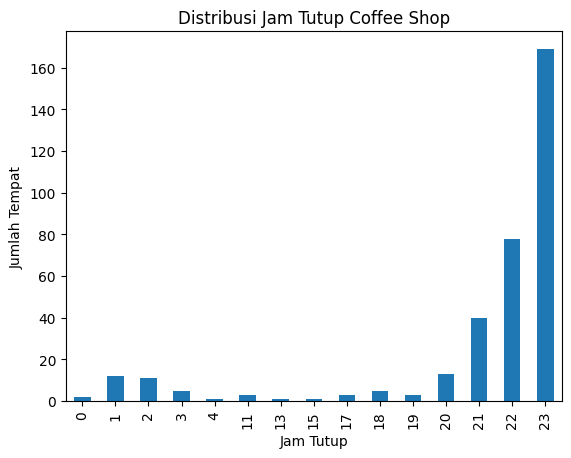

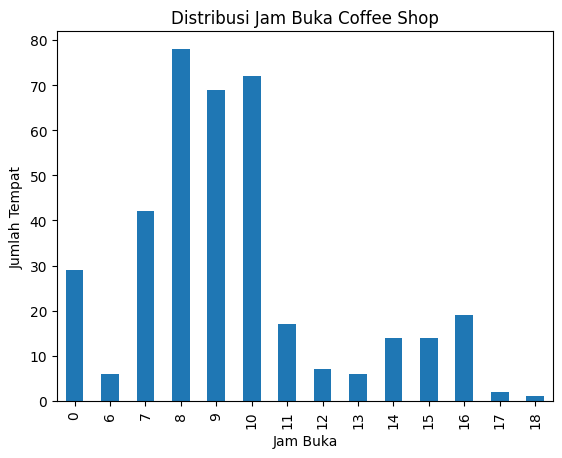

In [13]:
# Bar Chart - Jam Tutup
close_hour = (
    data.loc[~data["is_24h"] & data["close_time"].notna(), "close_time"]
    .apply(lambda x: pd.to_datetime(x, format='%H:%M').hour)
)

close_hour.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Jam Tutup")
plt.ylabel("Jumlah Tempat")
plt.title("Distribusi Jam Tutup Coffee Shop")
plt.show()

# Bar Chart - Jam Buka
open_hour = data.loc[data["open_time"].notna(), "open_time"].apply(lambda x: pd.to_datetime(x, format='%H:%M').hour)

open_hour.value_counts().sort_index().plot(kind="bar")
plt.xlabel("Jam Buka")
plt.ylabel("Jumlah Tempat")
plt.title("Distribusi Jam Buka Coffee Shop")
plt.show()

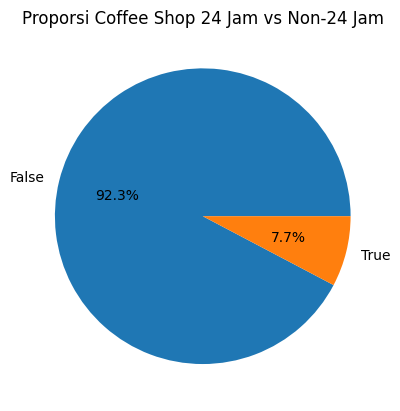

In [14]:
# Pie Chart — 24 Jam vs Non-24 Jam
data["is_24h"].value_counts().plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("")
plt.title("Proporsi Coffee Shop 24 Jam vs Non-24 Jam")
plt.show()


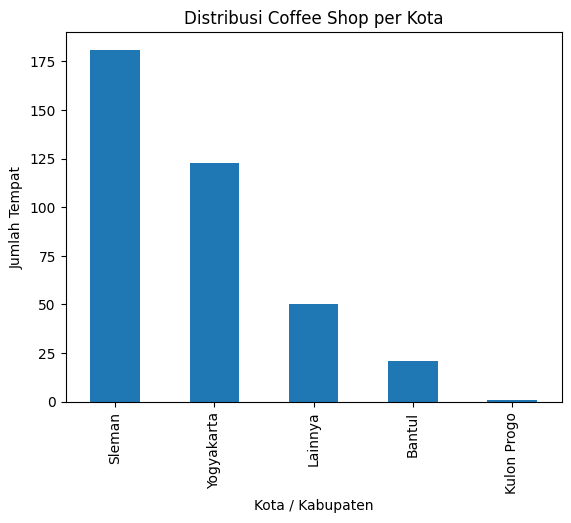

In [15]:
# Bar Chart - Kota / Kabupaten
data["kota"].value_counts().plot(kind="bar")
plt.xlabel("Kota / Kabupaten")
plt.ylabel("Jumlah Tempat")
plt.title("Distribusi Coffee Shop per Kota")
plt.show()

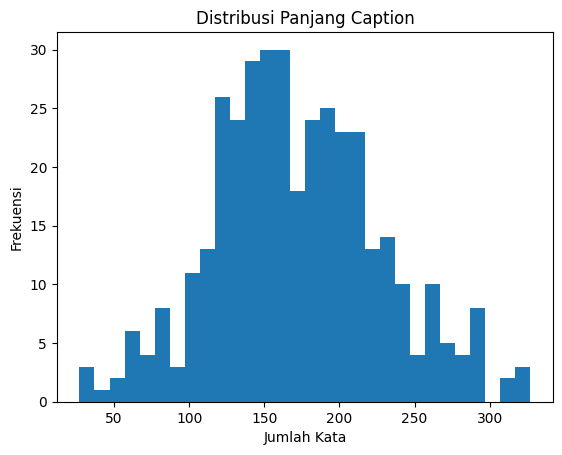

In [16]:
# Panjang Caption
caption_length = data["caption_norm"].dropna().apply(lambda x: len(x.split()))

plt.hist(caption_length, bins=30)
plt.xlabel("Jumlah Kata")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Caption")
plt.show()

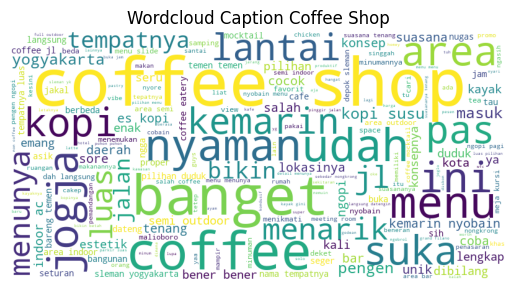

In [21]:
# Ambil stopwords bahasa Indonesia
stop_words = set(stopwords.words('indonesian'))

# Gabungkan semua caption
text = " ".join(data["caption_norm"].dropna())

# Stopword Removal
filtered_words = [
    word for word in text.split()
    if word.lower() not in stop_words
]

filtered_text = " ".join(filtered_words)

# Hapus hashtag dan mention
filtered_text = ' '.join(
    word for word in filtered_text.split()
    if not (word.startswith('#') or word.startswith('@'))
)

# Hapus alamat
filtered_text = ' '.join(
    word for word in filtered_text.split()
    if not any(char.isdigit() for char in word)
)

# Hapus kata tertentu
unwanted_words = {"link", "klik", "bio", "cek", "di", "sini", "untuk", "lebih", "lanjut",
                  "nggak", "yang", "ada", "dan", "dengan", "ini", "atau", "dari", "ke",
                  "di", "aja", "ya", "nih", "loh", "kok", "gak", "si", "saja", "oh", "iya",
                  "jl"}
filtered_text = ' '.join(
    word for word in filtered_text.split()
    if word.lower() not in unwanted_words
)

# Wordcloud
wc = WordCloud(
    width=800,
    height=400,
    background_color="white"
).generate(filtered_text)

plt.imshow(wc)
plt.axis("off")
plt.title("Wordcloud Caption Coffee Shop")
plt.show()